<a href="https://colab.research.google.com/github/R-Roy/AlgoProblems/blob/master/SpeedMl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
pip install speedml

In [43]:
from speedml import Speedml

In [44]:
sml = Speedml("sample_data/california_housing_test.csv","sample_data/california_housing_train.csv", target='population')
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[total_rooms, total_bedrooms, households]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (3000, 9) | test (17000, 9)",
Numerical High-cardinality,"[longitude, latitude, housing_median_age, tota...",(>10) categories. Use feature.density
Numerical Continuous,[median_income],~80% unique. Use plot.continuous.
Target Analysis (population),Pre-process.,Dimensionality reduction?


In [45]:
sml.train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


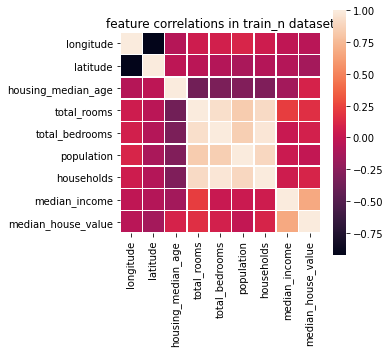

In [46]:
#Heatmap
sml.plot.correlate()

<Figure size 432x288 with 0 Axes>

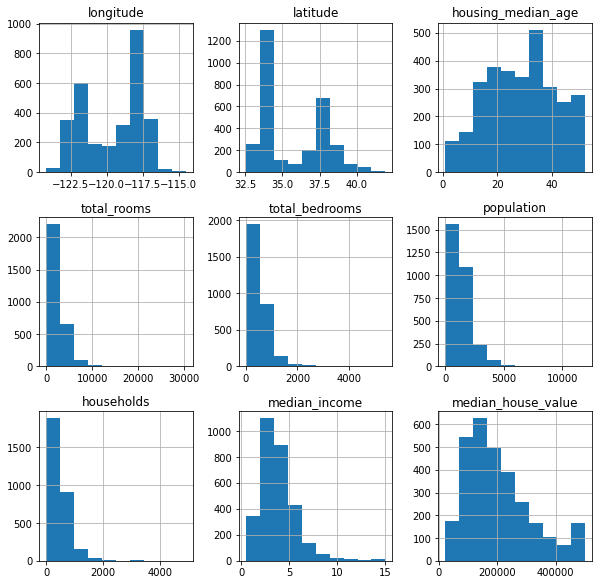

In [47]:
#Distribution Plot
sml.plot.distribute()

In [48]:
#Finding Feature density
sml.feature.density('median_income')
sml.train[['median_income', 'median_house_value']].head()

,median_income,median_house_value
0,6.6085,344700.0
1,3.5990,176500.0
2,5.7934,270500.0
3,6.1359,330000.0
4,2.9375,81700.0


In [37]:
sml.feature.impute()

'Imputed 0 empty values to 0.'

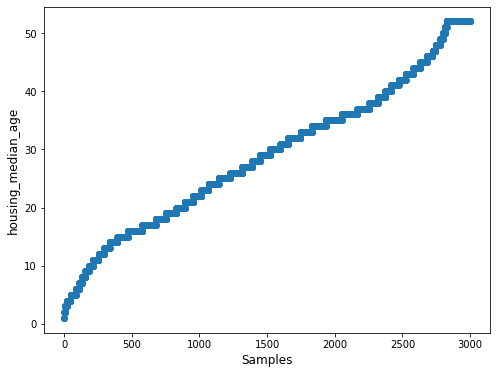

In [49]:
sml.plot.continuous('housing_median_age')

In [51]:
sml.configure('outliers_threshold', 5)

{'high_cardinality': 10,
 'outlier_threshold': 3,
 'outliers_threshold': 5,
 'outpath': 'output/',
 'overfit_threshold': 0.01,
 'unique_ratio': 80}

In [52]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,"[total_rooms, total_bedrooms, households, medi...",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (3000, 10) | test (17000, 10)",
Numerical High-cardinality,"[longitude, latitude, housing_median_age, tota...",(>10) categories. Use feature.density
Numerical Categorical,[median_income_density],Use plot.ordinal.
Numerical Continuous,[median_income],~80% unique. Use plot.continuous.
Target Analysis (population),Pre-process.,Dimensionality reduction?


In [53]:
sml.train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_density
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,1
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,1
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,1
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,3
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,3


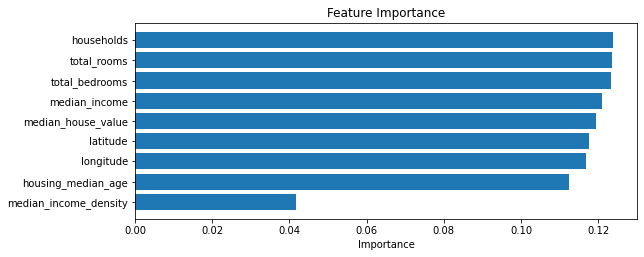

In [54]:
#Feature Importance
sml.plot.importance()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


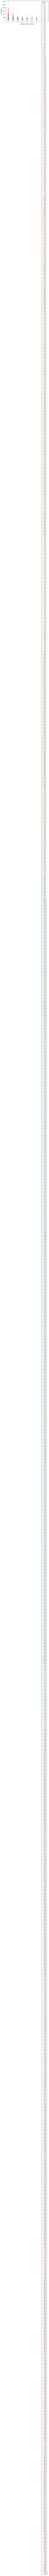

In [57]:
sml.plot.strip('median_income_density', 'population')